<a href="https://colab.research.google.com/github/Bhavishya-Chaturvedi/Implementations/blob/main/Simple_LTSM_RNN_for_Univariate_time_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten ,LSTM

In [31]:
#Univariete lSTM example
#Preprocessing independent and dependent features
def prepare_data(timeseries_data, n_steps):
  X, y = [] ,[]
  for i in range(len(timeseries_data)):
    # Find the end of this pattern
    end_ix = i + n_steps
    # Check whether we are beyond the sequence
    if end_ix > len(timeseries_data) -1 :
      break
    # Gather input and output parts of the patterns
    seq_x, seq_y = timeseries_data[i:end_ix] , timeseries_data[end_ix]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [32]:
#Define Input features
timeseries_data  = [110, 125, 133, 146, 158, 172, 187, 196, 210 ]
# Number of time steps
n_steps = 3
# Split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [33]:
print(X), print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [34]:
X.shape

(6, 3)

In [35]:
  #reshape from [sample, timesteps] into [sample, timesteps, features]
  n_features = 1
  X = X.reshape((X.shape[0],X.shape[1], n_features))

In [36]:
X.shape

(6, 3, 1)

Building LSTM

In [37]:
# Define the model
model = Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(n_steps,n_features)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#fit model
model.fit(X,y, epochs=300, verbose =1)

Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 32926.9844
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 32362.0781
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 31832.3418
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 31322.7344
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 30830.1816
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 30337.2422
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 29895.3984
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 29511.9473
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - loss: 29176.0254
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 28836.8359
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 28516.7734
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 28215.8223
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 27912.9824
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 27607.2871
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0

Predicting Value for next 10 days

In [40]:
#Demonstrate prediction for the next 10 days
x_input = np.array([187,196,210])
temp_input = list(x_input)
lst_output = []
i = 0
while(i<10):

  if (len(temp_input)>3):
    x_input=np.array(temp_input[1:])
    print("{} day input {}".format(i,x_input))
    #print x_input
    x_input = x_input.reshape((1,n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output {}".format(i,yhat))
    temp_input.append(yhat[0][0])
    temp_input=temp_input[1:]
    lst_output.append(yhat[0][0])
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.append(yhat[0][0])
    lst_output.append(yhat[0][0])
    i=i+1

print(lst_output)

[223.02399]
1 day input [196.         210.         223.02398682]
1 day output [[233.3011]]
2 day input [210.         223.02398682 233.30110168]
2 day output [[246.23454]]
3 day input [223.02399 233.3011  246.23454]
3 day output [[258.16376]]
4 day input [233.3011  246.23454 258.16376]
4 day output [[269.15173]]
5 day input [246.23454 258.16376 269.15173]
5 day output [[281.482]]
6 day input [258.16376 269.15173 281.482  ]
6 day output [[293.16516]]
7 day input [269.15173 281.482   293.16516]
7 day output [[304.6664]]
8 day input [281.482   293.16516 304.6664 ]
8 day output [[316.83484]]
9 day input [293.16516 304.6664  316.83484]
9 day output [[328.69696]]
[np.float32(223.02399), np.float32(233.3011), np.float32(246.23454), np.float32(258.16376), np.float32(269.15173), np.float32(281.482), np.float32(293.16516), np.float32(304.6664), np.float32(316.83484), np.float32(328.69696)]


In [41]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [42]:
len(timeseries_data)

9

In [44]:
lst_output = [float(x) for x in lst_output ]

In [45]:
lst_output

[223.02398681640625,
 233.3011016845703,
 246.2345428466797,
 258.16375732421875,
 269.1517333984375,
 281.48199462890625,
 293.1651611328125,
 304.6664123535156,
 316.8348388671875,
 328.69696044921875]

Visualing the output

In [47]:
import matplotlib.pyplot as plt

In [48]:
day_new = np.arange(1,10)
day_pred = np.arange(10,20)

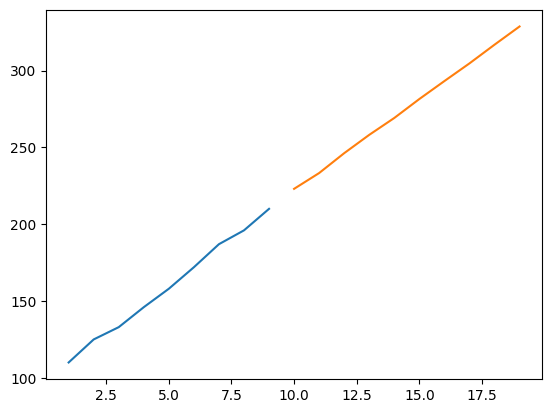

In [49]:
plt.plot(day_new, timeseries_data)
plt.plot(day_pred,lst_output)